# Introduction

# Setup

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, make_blobs

## Dataset

In [3]:
dataset = load_iris()
X = dataset.data
y = dataset.target

xTrain, xTest, yTrain, yTest = train_test_split(X, y)

# KMeans

In [60]:
class CustomKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, k=None, max_iter=300, tol=0.0001):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol

        
    @property
    def cluster_centers_(self):
        return self._cluster_centers

    @property
    def clusters_(self):
        return self._clusters
    
    
    def fit(self, X):
        self.X = X
        self._check_params(self.X)
        self._kmeans(self.X)
        self.fitted_ = True
        
        return self
    
    
    def _kmeans(self, X):
        centroids = []
        
        #initially taking first "k" points as centroids
        for i in range(self.k):
            centroids.append(X[i])

        clusters = {}
        for _ in range(self.max_iter):
            #resetting each cluster
            for i in range(self.k):
                clusters[i] = []

            #inserting each point to its respective cluster
            for point in X:
                # computing eucledian distances of current point from each centroid
                distances = [np.linalg.norm(centroid-point) for centroid in centroids]

                # getting index of closest cluster
                index = np.argmin(distances)

                # appending point(feature set) to list of cluster it belongs to
                clusters[index].append(point)

                
            #computing new centroids
            old_centroids = list(centroids)
            for i in range(self.k):
                # computing new centroid by taking mean of all points in current cluster
                new_centroid = np.mean(clusters[i], axis=0)

                #setting new centroid
                centroids[i] = new_centroid
                

            optimized = True
            for i in range(self.k):
                if not np.allclose(centroids[i], old_centroids[i], atol=self.tol):
                    optimized = False
                    break
            if optimized:
                break
        
        self._cluster_centers = np.array(centroids)
        self._clusters = clusters
        for i in range(self.k):
            self._clusters[i] = np.array(self._clusters[i])
        
    
    def _estimate_k(self, X):
        pass


    def predict(self, X):
        y_preds = []
        for point in X:
            # computing  eucledian distances between given point and centroids
            distances = [np.linalg.norm(centroid-point) for centroid in self.centroids]

            #cendroid with minimum distance
            y_preds.append(distances.argmin())
        
        return y_preds

    
    def _check_params(self, X):
        if self.k is None:
            self.k = self._estimate_k(self.X)

# CustomKMeans vs KMeans

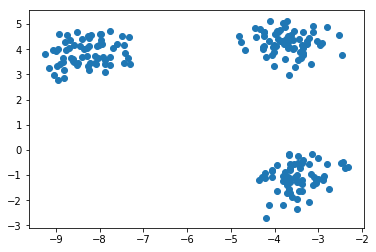

In [16]:
#creating clusters
X,y = make_blobs(n_features=2, n_samples=200, cluster_std=0.5)

#plotting data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [56]:
skModel = KMeans(n_clusters=3).fit(X)
custModel = CustomKMeans(k=3).fit(X)

In [57]:
print(skModel.cluster_centers_)
print()
print(custModel.cluster_centers_)

[[-8.29915382  3.84558308]
 [-3.46947621 -1.09708921]
 [-3.72149157  4.26698407]]

[[-3.72149157  4.26698407]
 [-8.29915382  3.84558308]
 [-3.46947621 -1.09708921]]


### Plotting CustomKMeans Results

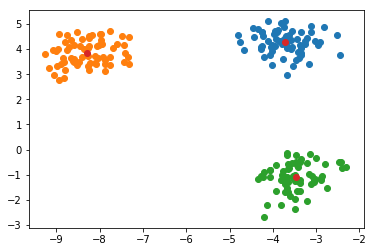

In [58]:
#plotting clusters
for k in custModel.clusters_:
    plt.scatter(custModel.clusters_[k][:,0], custModel.clusters_[k][:,1])
    
#plotting cluster centers
plt.scatter(custModel.cluster_centers_[:,0], custModel.cluster_centers_[:,1])
plt.show()

### Plotting KMeans Results

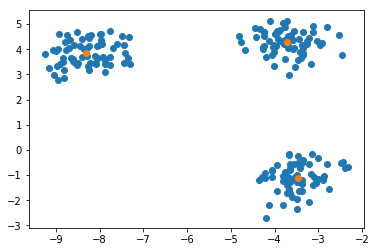

In [59]:
#plotting data
plt.scatter(X[:,0], X[:,1])
    
#plotting cluster centers
plt.scatter(skModel.cluster_centers_[:,0], skModel.cluster_centers_[:,1])
plt.show()